In [6]:
from collections import Counter
from random import shuffle
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

%matplotlib inline

In [11]:
def get_giant_size(net):
    """
    Calculates the size of the largest component (i.e. the giant component) of
    the network.

    Parameters
    ----------
    net: networkx.Graph() object

    Returns
    -------
    giant_size: int
        size of the giant component

    """
    lengths = map(len, nx.connected_components(net))
    return max(lengths)

def simulate_edge_removal(orignet, order):
    """
    Performs an edge removal simulation

    Parameters
    ----------
    orignet: networkx.Graph() object
        Network in which the edge removal is simulated. A copy of orignet is
        created for the simulations, and the original network is not changed.
    order: list of tuples
        network edges sorted in the order in which they will be removed

    Returns
    -------
    giant_sizes: np.array of ints
        sizes of the giant component at different edge densities
    """
    giant_sizes = []
    net = orignet.copy() # Creating a copy of the original network
    
    next_print_frac = 0.1
    for edges in order:
        net.remove_edge(*edges)
        giant_sizes.append(get_giant_size(net))
        
    return giant_sizes

def run_link_removal(path, net_name):
    """
    Sets up framework and runs the edge removal simulation.

    Parameters
    ----------
    path: string
        path to the network to be analyzed
    net_name: string
        name of the network (for labeling)

    Returns
    -------
    No direct output, saves figure of the giant component size as a function
    of network density.
    """
    # setting up:
    net = nx.read_weighted_edgelist(path) # Read the network from path
    N = len(net.nodes()) # Replace with the number of nodes
    edges = list(net.edges()) # Replace with the network edges

    fig = plt.figure(figsize=(16, 16 * 3 / 4.))
    ax = fig.add_subplot(111)
    fig.suptitle(net_name)

    print("Computing betweenness...")
    betweenness = nx.edge_betweenness_centrality(net)
    
    ascending_weight_edge_order = sorted(edges, 
                key=lambda edge: net.get_edge_data(*edge)['weight']
                                        ) 
    descending_weight_edge_order = ascending_weight_edge_order[::-1]
    
    random_edge_order = edges.copy()
    random.shuffle(random_edge_order)
    
    # sorting the edges by their betweenness:
    ebc_edge_order = sorted(edges, 
                            key=lambda edge: betweenness[edge], 
                            reverse=True)
    
    # edge removal:
    for order, order_name, color, ls, lw in zip(
        [descending_weight_edge_order, ascending_weight_edge_order,
         random_edge_order, ebc_edge_order],
        ["w_big_first",
         "w_small_first", 'random', "betweenness"],
        ["r", "y", "b", "k"],
        ["-", "-", "-", "-"],
        [2, 3, 4, 5]
    ):
        print(order_name.upper())

        giant_sizes = simulate_edge_removal(net, order)
        fracs = np.linspace(0, 1, len(giant_sizes))

        ax.plot(fracs, np.array(giant_sizes) / float(N), "-", color=color, ls=ls,
                label="g " + order_name, lw=lw)

        ax.set_ylabel('Largest Component Size') 
        ax.set_xlabel('Fraction of Removed Links')

        ax.legend(loc=2)

    return fig



Computing betweenness...
W_BIG_FIRST
W_SMALL_FIRST
RANDOM
BETWEENNESS


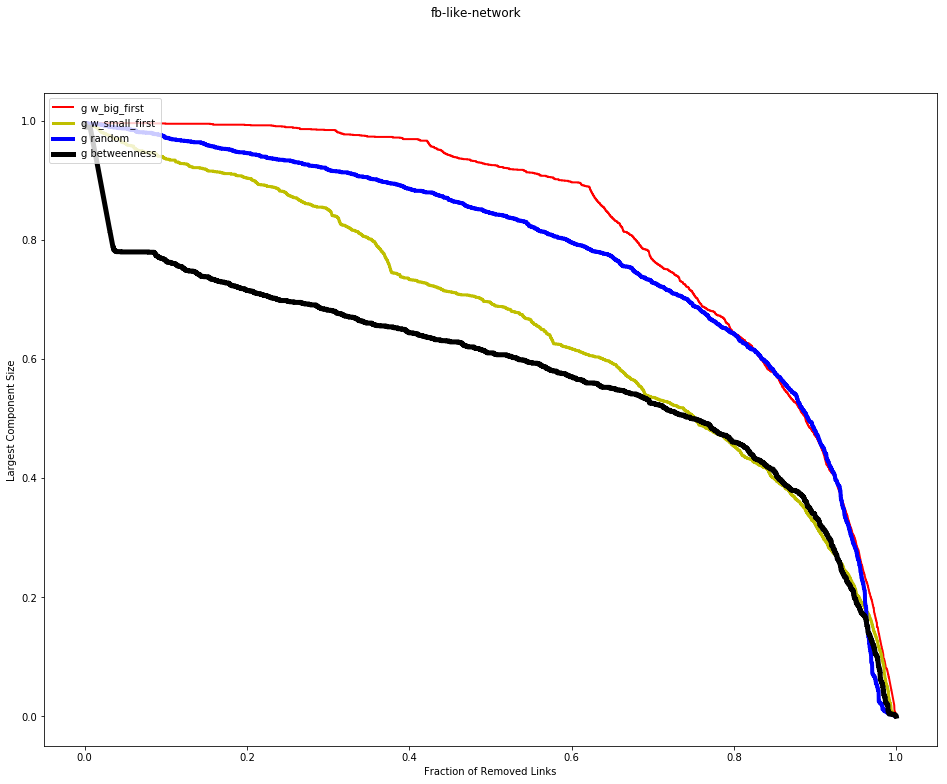

In [12]:
network_path = './OClinks_w_undir.edg' # You may want to change the path to the edge list file
network_name = 'fb-like-network'

fig = run_link_removal(network_path, network_name)